# 1. Preparation - Data Understanding

In [1]:
# Import libraries for data prepartion
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# 2. Processing 

## 2.1 Import the datasets

I would like to analyze the activity patterns across the month in different hours during the day. Datasets that are too detailed such as changes per minute and per second might not provide much insights, so they are not selected.

In [2]:
# Import relevant dataset
daily_activity = pd.read_csv("Fitabase_Data_4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_calories = pd.read_csv("Fitabase_Data_4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities = pd.read_csv("Fitabase_Data_4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps = pd.read_csv("Fitabase_Data_4.12.16-5.12.16/hourlySteps_merged.csv")
daily_sleep = pd.read_csv("Fitabase_Data_4.12.16-5.12.16/sleepDay_merged.csv")
weight_log = pd.read_csv("Fitabase_Data_4.12.16-5.12.16/weightLogInfo_merged.csv")

## 2.2 Preview the data

In [3]:
# Information about datasets
daily_activity.info()
print("\n=====================================\n")
hourly_calories.info()
print("\n=====================================\n")
hourly_intensities.info()
print("\n=====================================\n")
hourly_steps.info()
print("\n=====================================\n")
daily_sleep.info()
print("\n=====================================\n")
weight_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Check number of participants in each table by looking into number of unique ID:

In [4]:
# Number of unique ID in each dataset
print(daily_activity['Id'].nunique(),
      hourly_calories['Id'].nunique(), 
      hourly_intensities['Id'].nunique(),
      hourly_steps['Id'].nunique(),
      daily_sleep['Id'].nunique(),
      weight_log['Id'].nunique())

33 33 33 33 24 8


In the dataset weight_log, having only 8 participants are too few to provide reliable information, so the dataset will not be used.

## 2.3 Data Cleaning

#### Formatting: Standardize date and time formats. By viewing the dataset in Excel, I discovered the date and time attributes are inconsistent. Therefore, we need to correctly standardized their formats so as to easily join different tables together.  

In [5]:
hourly_calories.head(10)

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48
5,1503960366,4/12/2016 5:00:00 AM,48
6,1503960366,4/12/2016 6:00:00 AM,48
7,1503960366,4/12/2016 7:00:00 AM,47
8,1503960366,4/12/2016 8:00:00 AM,68
9,1503960366,4/12/2016 9:00:00 AM,141


In [6]:
# daily_activity
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format='%m/%d/%Y').dt.date

# hourly_calories: split into date and time
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourly_calories['Date'] = hourly_calories['ActivityHour'].dt.date
hourly_calories['Time'] = hourly_calories['ActivityHour'].dt.time

# hourly_intensities: split into date and time
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourly_intensities['Date'] = hourly_intensities['ActivityHour'].dt.date
hourly_intensities['Time'] = hourly_intensities['ActivityHour'].dt.time

# hourly_steps: split into date and time
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourly_steps['Date'] = hourly_steps['ActivityHour'].dt.date
hourly_steps['Time'] = hourly_steps['ActivityHour'].dt.time

# daily_sleep: split into date and time
daily_sleep['SleepDay'] = pd.to_datetime(daily_sleep['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
daily_sleep['Date'] = daily_sleep['SleepDay'].dt.date
daily_sleep['Time'] = daily_sleep['SleepDay'].dt.time

In [7]:
# Drop irrelevant columns
daily_activity = daily_activity.drop('TrackerDistance', axis=1)
hourly_calories = hourly_calories.drop('ActivityHour', axis=1)
hourly_intensities = hourly_intensities.drop('ActivityHour', axis=1)
hourly_steps = hourly_steps.drop('ActivityHour', axis=1)
daily_sleep = daily_sleep.drop(['SleepDay', 'Time'], axis=1)

#### Duplicates: Drop any possible duplicated records

In [8]:
full_datasets = [daily_activity, hourly_calories, hourly_intensities, hourly_steps, daily_sleep]

In [9]:
# drop duplicates 
for dataset in full_datasets: 
    dataset.drop_duplicates()

#### Missing Values: Handling missing values. After checking, there are no missing values in the datasets to be used.

In [10]:
# check if there are missing values 
for dataset in full_datasets:
    print(dataset.isnull().any())
    print("\n===============\n")

Id                          False
ActivityDate                False
TotalSteps                  False
TotalDistance               False
LoggedActivitiesDistance    False
VeryActiveDistance          False
ModeratelyActiveDistance    False
LightActiveDistance         False
SedentaryActiveDistance     False
VeryActiveMinutes           False
FairlyActiveMinutes         False
LightlyActiveMinutes        False
SedentaryMinutes            False
Calories                    False
dtype: bool


Id          False
Calories    False
Date        False
Time        False
dtype: bool


Id                  False
TotalIntensity      False
AverageIntensity    False
Date                False
Time                False
dtype: bool


Id           False
StepTotal    False
Date         False
Time         False
dtype: bool


Id                    False
TotalSleepRecords     False
TotalMinutesAsleep    False
TotalTimeInBed        False
Date                  False
dtype: bool




#### Outliers: Detect and remove extreme values which are usually incorrect data

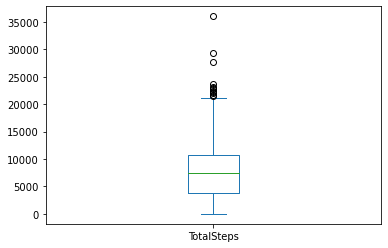

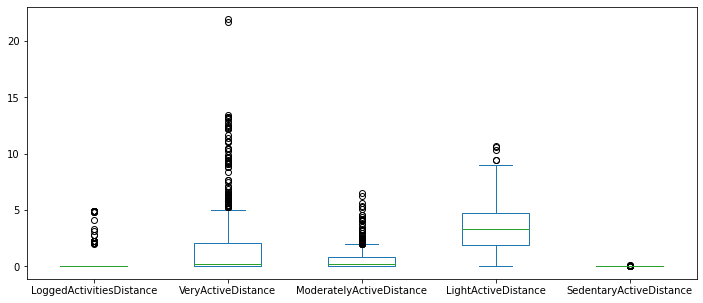

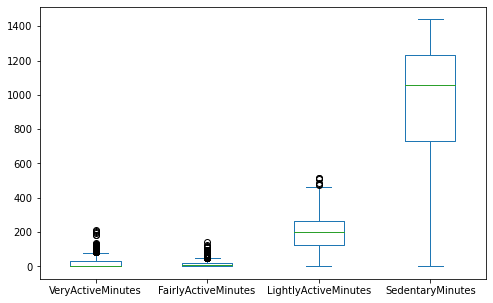

In [11]:
# Boxplots
ax1 = daily_activity['TotalSteps'].plot.box()

# seperate boxplots for features of distance 
lst_feat_distance = ['LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance'] 
ax2 = daily_activity[lst_feat_distance].plot.box(figsize=(12,5))

# seperate boxplots for features of active minutes
lst_feat_ActiveMins = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
ax3 = daily_activity[lst_feat_ActiveMins].plot.box(figsize=(8,5))

In [12]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [13]:
hourly_calories.head()

,Id,Calories,Date,Time
0,1503960366,81,2016-04-12,00:00:00
1,1503960366,61,2016-04-12,01:00:00
2,1503960366,59,2016-04-12,02:00:00
3,1503960366,47,2016-04-12,03:00:00
4,1503960366,48,2016-04-12,04:00:00


In [14]:
hourly_intensities.head()

,Id,TotalIntensity,AverageIntensity,Date,Time
0,1503960366,20,0.333333,2016-04-12,00:00:00
1,1503960366,8,0.133333,2016-04-12,01:00:00
2,1503960366,7,0.116667,2016-04-12,02:00:00
3,1503960366,0,0.000000,2016-04-12,03:00:00
4,1503960366,0,0.000000,2016-04-12,04:00:00


In [15]:
hourly_steps.head()

,Id,StepTotal,Date,Time
0,1503960366,373,2016-04-12,00:00:00
1,1503960366,160,2016-04-12,01:00:00
2,1503960366,151,2016-04-12,02:00:00
3,1503960366,0,2016-04-12,03:00:00
4,1503960366,0,2016-04-12,04:00:00


In [16]:
daily_sleep.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date
0,1503960366,1,327,346,2016-04-12
1,1503960366,2,384,407,2016-04-13
2,1503960366,1,412,442,2016-04-15
3,1503960366,2,340,367,2016-04-16
4,1503960366,1,700,712,2016-04-17


In [17]:
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         22099 non-null  int64 
 1   StepTotal  22099 non-null  int64 
 2   Date       22099 non-null  object
 3   Time       22099 non-null  object
dtypes: int64(2), object(2)
memory usage: 690.7+ KB


## 2.4 Merging Datasets

In [18]:
# Merge datasets measured hourly 
hourly_activity_merged = pd.merge(hourly_calories, hourly_intensities, on=['Id', 'Date', 'Time'])
hourly_activity_merged = pd.merge(hourly_activity_merged, hourly_steps, on=['Id', 'Date', 'Time'])

In [19]:
# Merge daily_activity with daily_sleep 
daily_activity_merged = pd.merge(daily_activity, daily_sleep, 
                                 left_on=['ActivityDate', 'Id'], 
                                 right_on=['Date', 'Id'])

In [20]:
# add column giving information on the day of the week
hourly_activity_merged['Weekday'] = pd.to_datetime(hourly_activity_merged['Date'], format='%Y/%m/%d').dt.day_name()

daily_activity_merged['Weekday'] = pd.to_datetime(daily_activity_merged['Date'], format='%Y/%m/%d').dt.day_name()

In [21]:
# drop duplicated columns 
daily_activity_merged.drop('ActivityDate', axis=1)

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,Weekday
0,1503960366,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,2016-04-12,Tuesday
1,1503960366,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,2016-04-13,Wednesday
2,1503960366,9762,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,2016-04-15,Friday
3,1503960366,12669,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,2016-04-16,Saturday
4,1503960366,9705,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,2016-04-17,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,7174,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1,343,360,2016-04-30,Saturday
409,8792009665,1619,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1,503,527,2016-05-01,Sunday
410,8792009665,1831,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1,415,423,2016-05-02,Monday
411,8792009665,2421,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1,516,545,2016-05-03,Tuesday


## 2.5 Summary for the merged datasets

In [22]:
# Summary for activity and sleep data of a day
daily_activity_merged.info()

lst_cols = []
for col in list(daily_activity_merged.columns.values):
    if col not in ['Id', 'Date', 'Weekday']:
        lst_cols.append(col)
    
daily_activity_merged[lst_cols].describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        413 non-null    int64  
 1   ActivityDate              413 non-null    object 
 2   TotalSteps                413 non-null    int64  
 3   TotalDistance             413 non-null    float64
 4   LoggedActivitiesDistance  413 non-null    float64
 5   VeryActiveDistance        413 non-null    float64
 6   ModeratelyActiveDistance  413 non-null    float64
 7   LightActiveDistance       413 non-null    float64
 8   SedentaryActiveDistance   413 non-null    float64
 9   VeryActiveMinutes         413 non-null    int64  
 10  FairlyActiveMinutes       413 non-null    int64  
 11  LightlyActiveMinutes      413 non-null    int64  
 12  SedentaryMinutes          413 non-null    int64  
 13  Calories                  413 non-null    int64  
 14  TotalSleep

,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,8541.140436,6.038620,0.113142,1.450363,0.750242,3.807119,0.000920,25.188862,18.038741,216.854722,712.169492,2397.573850,1.118644,419.467312,458.639225
std,4156.926990,3.051998,0.513107,1.994352,1.000183,1.734511,0.008653,36.388187,22.403590,87.164687,165.957432,762.886326,0.345521,118.344679,127.101607
min,17.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000,1.000000,58.000000,61.000000
25%,5206.000000,3.600000,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.000000,158.000000,631.000000,1850.000000,1.000000,361.000000,403.000000
50%,8925.000000,6.290000,0.000000,0.570000,0.420000,3.680000,0.000000,9.000000,11.000000,208.000000,717.000000,2220.000000,1.000000,433.000000,463.000000
75%,11393.000000,8.030000,0.000000,2.370000,1.040000,4.930000,0.000000,38.000000,27.000000,263.000000,783.000000,2926.000000,1.000000,490.000000,526.000000
max,22770.000000,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,143.000000,518.000000,1265.000000,4900.000000,3.000000,796.000000,961.000000


In [23]:
# Summary for activity data of a day recorded hourly 
hourly_activity_merged.info()

lst_cols = []
for col in list(hourly_activity_merged.columns.values):
    if col not in ['Id', 'Date', 'Time', 'Weekday']:
        lst_cols.append(col)
    
hourly_activity_merged[lst_cols].describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   Calories          22099 non-null  int64  
 2   Date              22099 non-null  object 
 3   Time              22099 non-null  object 
 4   TotalIntensity    22099 non-null  int64  
 5   AverageIntensity  22099 non-null  float64
 6   StepTotal         22099 non-null  int64  
 7   Weekday           22099 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


,Calories,TotalIntensity,AverageIntensity,StepTotal
count,22099.000000,22099.000000,22099.000000,22099.000000
mean,97.386760,12.035341,0.200589,320.166342
std,60.702622,21.133110,0.352219,690.384228
min,42.000000,0.000000,0.000000,0.000000
25%,63.000000,0.000000,0.000000,0.000000
50%,83.000000,3.000000,0.050000,40.000000
75%,108.000000,16.000000,0.266667,357.000000
max,948.000000,180.000000,3.000000,10554.000000


# 3. Analyze

## 3.1 Sleeping Behaviour

### 3.1.1 Time Asleep

Text(0.5, 1.0, 'Distribution of TIme Asleep')

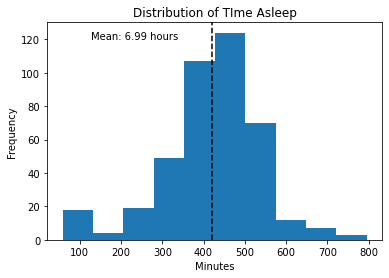

In [24]:
# Histogram of Time Asleep
ax = daily_activity_merged['TotalMinutesAsleep'].plot.hist(grid=False)
mean_asleep = daily_activity_merged['TotalMinutesAsleep'].mean()

plt.axvline(mean_asleep, color='k', linestyle='dashed')
plt.text(mean_asleep*0.3, 120 , f"Mean: {mean_asleep/60:.2f} hours")

ax.set_xlabel("Minutes")
ax.set_title("Distribution of TIme Asleep")

In [25]:
# Percentage of Sleeps below 7 hours of sleep 
percent_little_sleep = len(daily_activity_merged[daily_activity_merged['TotalMinutesAsleep'] < 7*60])/len(daily_activity_merged['TotalMinutesAsleep'])
print(f"{percent_little_sleep*100:.2f}% of sleep records fall below 7 hours.")

44.07% of sleep records fall below 7 hours.


Insight: The average duration of sleep barely reach the recommended hours of sleep of 7 hours for adults. Meanwhile, nearly half of the total records are below 7 hours.

### 3.1.2 Non-sleeping Bed Time

In [26]:
# Analysis of Bed Time

daily_activity_merged['AwakeBedTime'] = daily_activity_merged['TotalTimeInBed'] - daily_activity_merged['TotalMinutesAsleep']
print(f"Average Minutes of Awake Bed Time: {daily_activity_merged['AwakeBedTime'].mean():.2f} minutes")

Average Minutes of Awake Bed Time: 39.17 minutes


Text(0.5, 1.0, 'Distribution of Awake Bed Time')

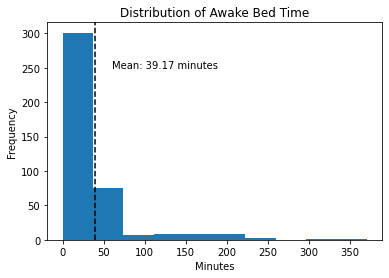

In [27]:
# Histogram of Awake Bed Time
ax = daily_activity_merged['AwakeBedTime'].plot.hist(grid=False)
mean_awake = daily_activity_merged['AwakeBedTime'].mean()

plt.axvline(mean_awake, color='k', linestyle='dashed')
plt.text(60,250, f"Mean: {mean_awake:.2f} minutes")

ax.set_xlabel("Minutes")
ax.set_title("Distribution of Awake Bed Time")

Insight: Lower than normal length of time needed to fall asleep, which ranges between 10 to 20 minutes. It indicates the average users need improvement in falling asleep. 

### 3.1.3 Relationships between Physical Activities and Sleep Patterns

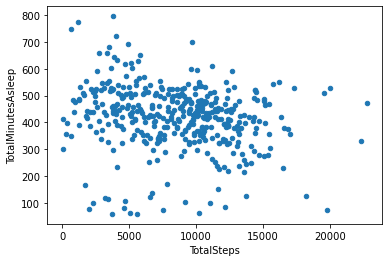

In [28]:
# Relationships between physical activies and sleep
ax = daily_activity_merged.plot.scatter(x='TotalSteps', y='TotalMinutesAsleep')

Insight: No clear pattern between physical activities and duration of sleep 

## 3.2 Patterns of Physical Activities Across a Week

In [29]:
# Grouped as weekday - Analysis 
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity_grouped = daily_activity_merged.groupby('Weekday').mean().reindex(cats)
daily_activity_grouped

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,AwakeBedTime
Weekday,,,,,,,,,,,,,,,,,
Monday,5.057965e+09,9339.851064,6.611064,0.349228,1.804894,0.786170,4.011915,0.002128,32.553191,19.021277,220.638298,717.851064,2465.446809,1.106383,418.829787,456.170213,37.340426
Tuesday,4.911466e+09,9182.692308,6.430000,0.138651,1.718462,0.816615,3.886615,0.001385,30.615385,20.046154,216.584615,740.046154,2496.200000,1.107692,404.538462,443.292308,38.753846
Wednesday,5.264718e+09,8022.863636,5.719849,0.095098,1.357879,0.704091,3.652121,0.000000,21.333333,16.742424,207.969697,714.454545,2378.242424,1.151515,434.681818,470.030303,35.348485
Thursday,5.023285e+09,8205.353846,5.798154,0.166784,1.241385,0.676615,3.717385,0.002769,22.692308,16.215385,202.876923,701.415385,2315.784615,1.030769,402.369231,435.800000,33.430769
Friday,4.922502e+09,7901.403509,5.511930,0.073409,1.134035,0.588070,3.779474,0.000175,21.157895,14.578947,222.684211,743.087719,2329.649123,1.070175,405.421053,445.052632,39.631579
Saturday,4.955573e+09,9948.689655,7.095690,0.000000,1.759655,0.986379,4.347241,0.000000,27.172414,23.120690,250.086207,678.655172,2527.172414,1.189655,420.810345,461.275862,40.465517
Sunday,4.844438e+09,7297.854545,5.184727,0.000000,1.190182,0.702545,3.289273,0.000000,22.145455,16.763636,200.036364,687.636364,2276.600000,1.181818,452.745455,503.509091,50.763636


### 3.2.1 Daily Steps in a Week

Text(1.5, 9300, 'Recommended Steps')

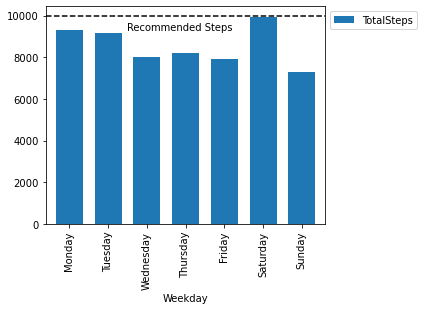

In [30]:
daily_activity_grouped.plot.bar(y='TotalSteps', figsize=(5,4), width=0.7)

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.axhline(y=10000, color='k', linestyle='dashed')
plt.text(1.5, 9300, "Recommended Steps")

# Insights: 
# A proxy of overall physical activities -> when either steps/active minutes fall below standard -> reminder
# Goals: 10000 steps
# weekdays except Saturday < 10000 .'. suggest walk more 

Insights:

Users walk less than 10,000 steps per day in most days. They tend to walk more on Saturday and reach the recommended steps of 10,000. 

### 3.2.2 Daily Active Minutes in a Week

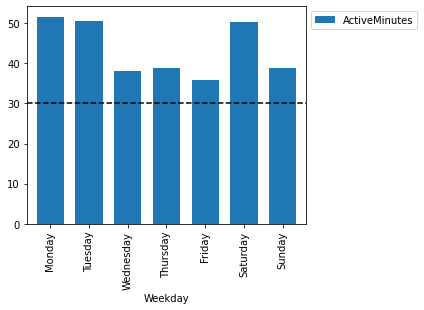

In [31]:
daily_activity_grouped['ActiveMinutes'] = daily_activity_grouped['FairlyActiveMinutes'] + daily_activity_grouped['VeryActiveMinutes']
daily_activity_grouped.plot.bar(y='ActiveMinutes', figsize=(5,4), width=0.7)

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.axhline(y=30, color='k', linestyle='dashed')

# Q: Suggested active minutes? 30mins/day 
# Insights: 
# least active: Wed-Fri & Sunday

Insights: 

Users are the least active from Wednesday to Friday and Sunday.

Average active minutes meets the recommended duration of 30 minutes per day. One possible reason is that fitness device users tend to work out more. 

### 3.2.3 Analysis without Clear Patterns

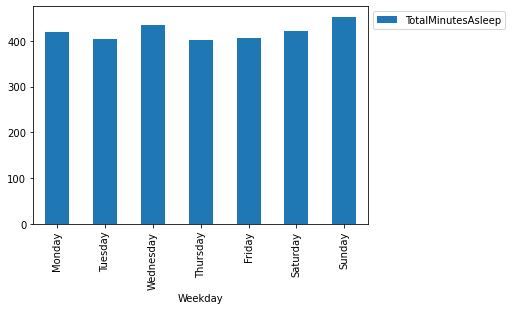

In [32]:
daily_activity_grouped.plot.bar(y='TotalMinutesAsleep')
plt.legend(bbox_to_anchor=(1.0, 1.0))

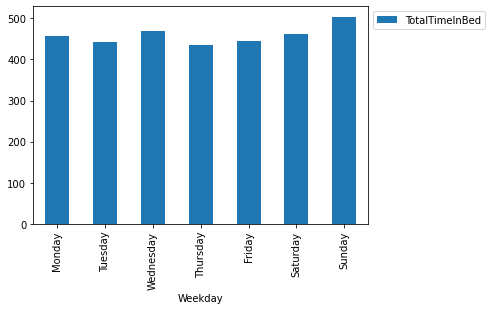

In [33]:
daily_activity_grouped.plot.bar(y='TotalTimeInBed')
plt.legend(bbox_to_anchor=(1.0, 1.0))

Below are more analysis without obvious patterns

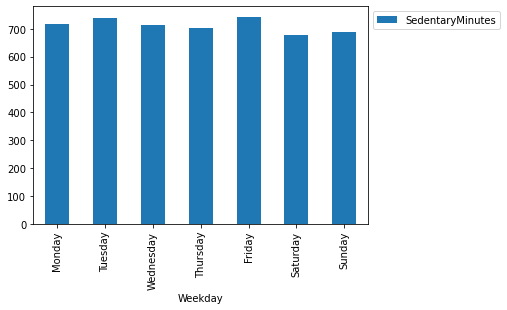

In [34]:
daily_activity_grouped.plot.bar(y='SedentaryMinutes')
plt.legend(bbox_to_anchor=(1.0, 1.0))

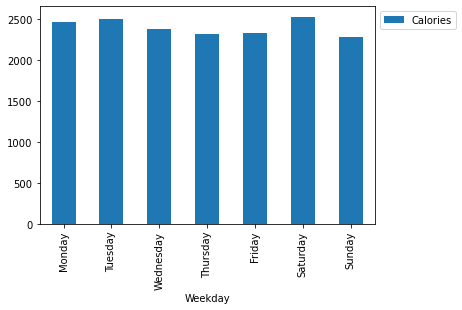

In [35]:
daily_activity_grouped.plot.bar(y='Calories')
plt.legend(bbox_to_anchor=(1.0, 1.0))

## 3.3 Patterns of Physical Activities in a Day

In [36]:
hourly_activity_merged

,Id,Calories,Date,Time,TotalIntensity,AverageIntensity,StepTotal,Weekday
0,1503960366,81,2016-04-12,00:00:00,20,0.333333,373,Tuesday
1,1503960366,61,2016-04-12,01:00:00,8,0.133333,160,Tuesday
2,1503960366,59,2016-04-12,02:00:00,7,0.116667,151,Tuesday
3,1503960366,47,2016-04-12,03:00:00,0,0.000000,0,Tuesday
4,1503960366,48,2016-04-12,04:00:00,0,0.000000,0,Tuesday
...,...,...,...,...,...,...,...,...
22094,8877689391,126,2016-05-12,10:00:00,12,0.200000,514,Thursday
22095,8877689391,192,2016-05-12,11:00:00,29,0.483333,1407,Thursday
22096,8877689391,321,2016-05-12,12:00:00,93,1.550000,3135,Thursday
22097,8877689391,101,2016-05-12,13:00:00,6,0.100000,307,Thursday


### 3.3.1 Number of Steps in Different Time

In [37]:
# Group by Time

hourly_activity_grouped = hourly_activity_merged.groupby('Time').mean()

Text(0.5, 1.0, 'Steps Throughout the Day')

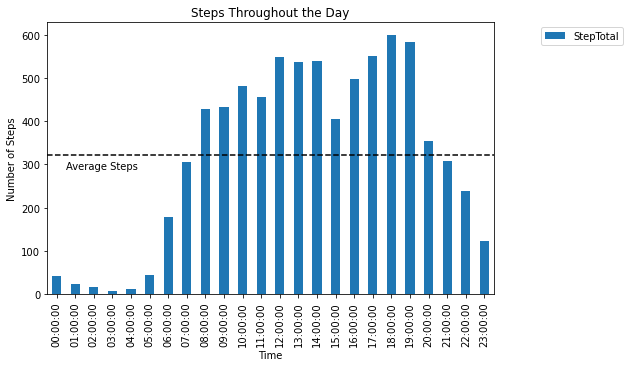

In [42]:
# Histogram of Steps Across a Day
ax = hourly_activity_grouped.plot.bar(y='StepTotal', figsize=(8,5))

ax.legend(bbox_to_anchor=(1.3, 1.0))
ax.axhline(y=hourly_activity_grouped['StepTotal'].mean(), color='k', linestyle='dashed')
ax.text(0.5, hourly_activity_grouped['StepTotal'].mean()*0.9, "Average Steps")
ax.set_ylabel("Number of Steps")
ax.set_title("Steps Throughout the Day")

Insights: 

Users are the most active around noon and late-afternoon. 

# 4. Insights and Strategy Suggestions

## 4.1 Key Insights

1. Many users do not have enough sleep. Nearly half of the users do not sleep for the amount of 7 hours, which is the recommended length of sleep for adults.
2. Many users need help in falling asleep. Their required time to fall asleep is longer than the that of normal sleeper cycle.
3. The average users do not have sufficient walk except on Saturday.
4. Users are the least active on Wednesday, Thursday, Friday and Sunday.
5. Users are the most active aroudn noon (11:00-14:00) and late-afternoon (17:00-19:00).

## 4.2 Marketing Strategy Suggestions

1. Service of Personalized Sleep Assistant: Establish a sleep schedule based on the users' input or anlaysis of sleep data. Send notifications one hour before the target bedtime to remind users to turn off their screens. Reminder to go to bed when it has reached the target bedtime. 
This value-added function of the smart device may increase customer satisfaction and loyalty.

2. Point-generating Achievement: First, let users set a daily goals of activity (e.g. number of steps, active time etc.). When users are working towards the daily goals, they get points. During certain hours of the day where the average users are the most active (noon and late-afternoon), they get bonus points if they exercises. Then, establish a rank where users compete with other users. 